In [1]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import glob
import ast
import chromoscores.maputils as chrmap
import chromoscores.snipping as chrsnip
import scorefunctions as chrscores

To extract the average properties of a feature in a Hi-C map, we can make a summation of the snippets with specified feature (e.g., TADs). In this notebook we showed the usage of pile-up functions for the analysis of few fetures. For the average properties such as flames we might be interested in working on normalized map, to be unbiased with respect to the distance from the diagonal.

### Loading simulated data

In [9]:
path_dict = {}

directory = '/project/fudenber_735/polychrom/pds5_wapl_nipbl/layout_with_random_boundary/simulations/Dynamic_boundary_elements/regular_lattice/sims/'

for name  in glob.glob(directory+'folder_*'):
    path_dict[name.split('sims/')[1][:]]= name
path_dict = dict(sorted(path_dict.items()))



### Analysis

In [23]:
#List of the position of boundary elements on the main diagonal. 

right_boundary_list=list(np.arange(100,1000,50))
#right_boundary_list=[right_boundary_list[i]+1500 for i in range(len(right_boundary_list))]

left_boundary_list=list(np.arange(100,1000,50))
#left_boundary_list=[left_boundary_list[i]+1500 for i in range(len(left_boundary_list))]

lst=right_boundary_list+left_boundary_list
lst=np.sort(lst)
lst=np.unique(lst)
print(lst)

[100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950]


---

- If we consider all of the boundary elements:

folder_face_1.0_back_0_Clife_1.5_Cof_0.15_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33


/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/home1/rahmanin/repositories/chromoscores/chromoscores/maputils.py:79: RuntimeWarning: invalid value encountered in double_scalars
  mat[i, i + j] = contact_map[i, i + j] / (np.mean(np.diag(contact_map, k=j)))


1.857198722138595


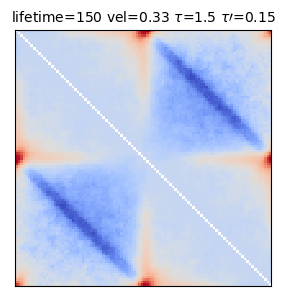

folder_face_1.0_back_0_Clife_1.5_Cof_0.15_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.103406608147673


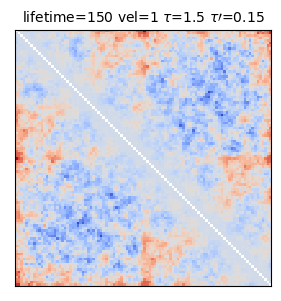

folder_face_1.0_back_0_Clife_1.5_Cof_0.15_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.089385804379871


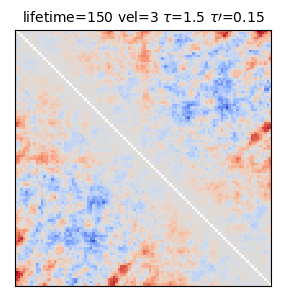

folder_face_1.0_back_0_Clife_1.5_Cof_0.15_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.4286430805291852


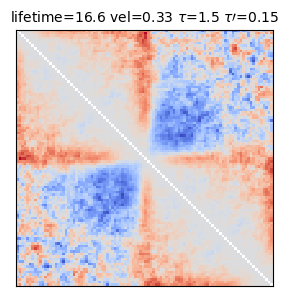

folder_face_1.0_back_0_Clife_1.5_Cof_0.15_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.1335399393146246


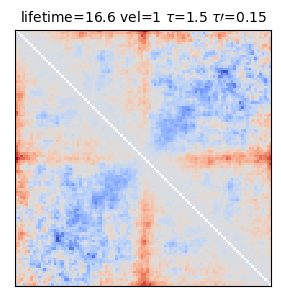

folder_face_1.0_back_0_Clife_1.5_Cof_0.15_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.0987131123283598


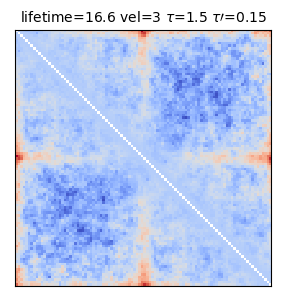

folder_face_1.0_back_0_Clife_1.5_Cof_0.15_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.7476805356835348


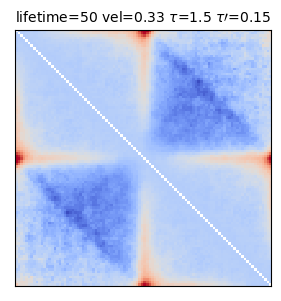

folder_face_1.0_back_0_Clife_1.5_Cof_0.15_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.140028504053933


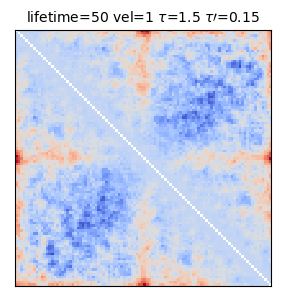

folder_face_1.0_back_0_Clife_1.5_Cof_0.15_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.0551707620568338


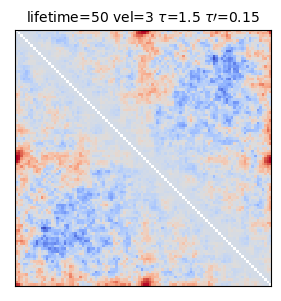

folder_face_1.0_back_0_Clife_1.5_Cof_0.1_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.8318373606168992


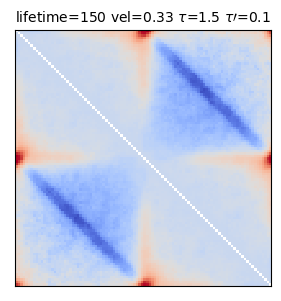

folder_face_1.0_back_0_Clife_1.5_Cof_0.1_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.7756999822610793


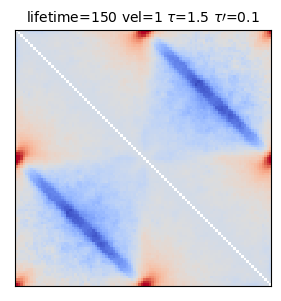

folder_face_1.0_back_0_Clife_1.5_Cof_0.1_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.0741950112320073


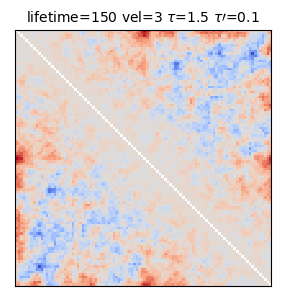

folder_face_1.0_back_0_Clife_1.5_Cof_0.1_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.421235732473839


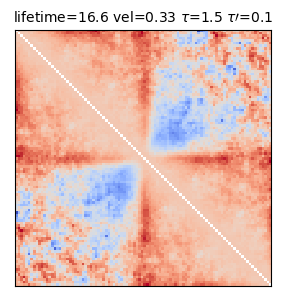

folder_face_1.0_back_0_Clife_1.5_Cof_0.1_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.850187932456936


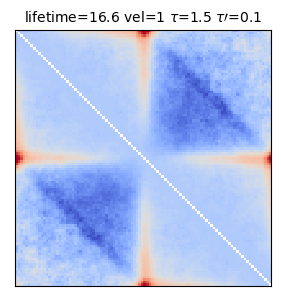

folder_face_1.0_back_0_Clife_1.5_Cof_0.1_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.2015854919277003


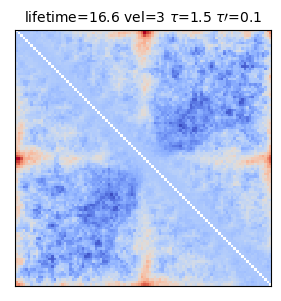

folder_face_1.0_back_0_Clife_1.5_Cof_0.1_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.7767759852219362


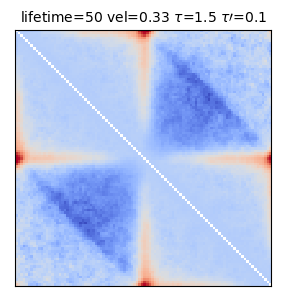

folder_face_1.0_back_0_Clife_1.5_Cof_0.1_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.843452994179332


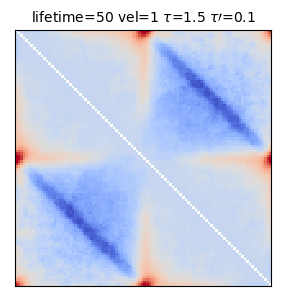

folder_face_1.0_back_0_Clife_1.5_Cof_0.1_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.0486862391564784


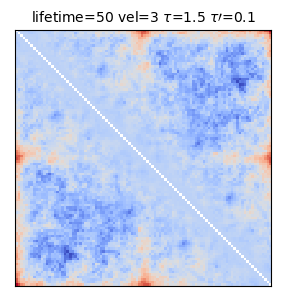

folder_face_1.0_back_0_Clife_1.5_Cof_0.3_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.8106920099745623


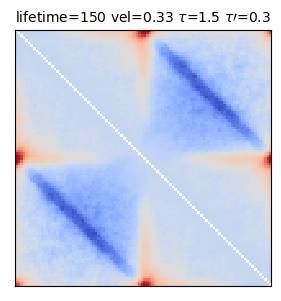

folder_face_1.0_back_0_Clife_1.5_Cof_0.3_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.0688966214076472


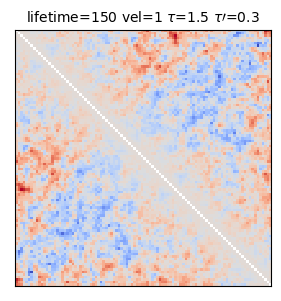

folder_face_1.0_back_0_Clife_1.5_Cof_0.3_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.0218144137130014


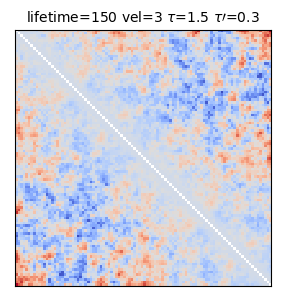

folder_face_1.0_back_0_Clife_1.5_Cof_0.3_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.3921387570437664


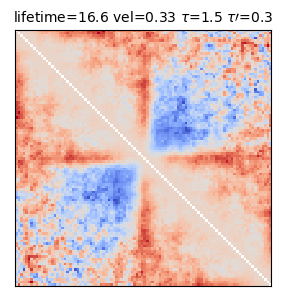

folder_face_1.0_back_0_Clife_1.5_Cof_0.3_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.0816544368875287


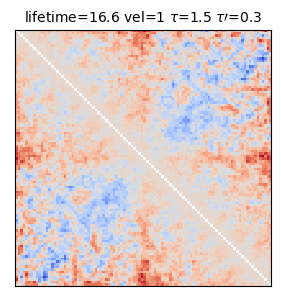

folder_face_1.0_back_0_Clife_1.5_Cof_0.3_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.1242414235330622


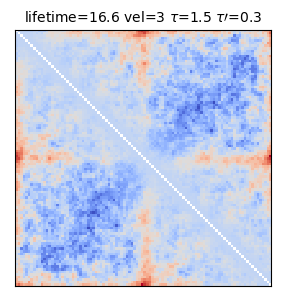

folder_face_1.0_back_0_Clife_1.5_Cof_0.3_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.8042674191093928


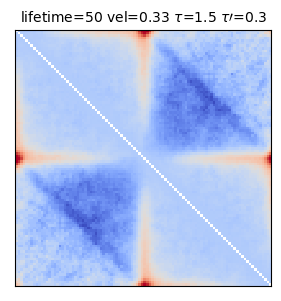

folder_face_1.0_back_0_Clife_1.5_Cof_0.3_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.0563863905231285


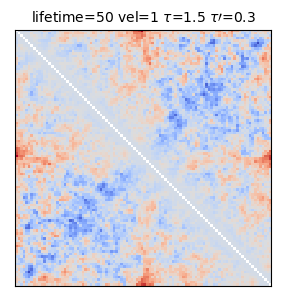

folder_face_1.0_back_0_Clife_1.5_Cof_0.3_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.0563568070441942


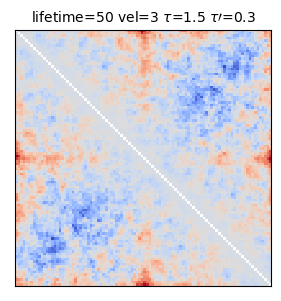

folder_face_1.0_back_0_Clife_1.5_Cof_1.5_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.0299279661567


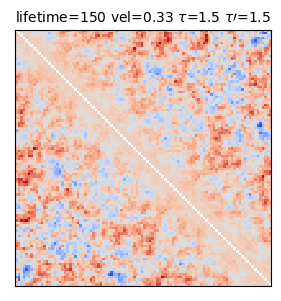

folder_face_1.0_back_0_Clife_1.5_Cof_1.5_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.0248117314748153


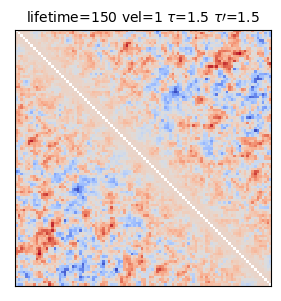

folder_face_1.0_back_0_Clife_1.5_Cof_1.5_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
0.9733931982614618


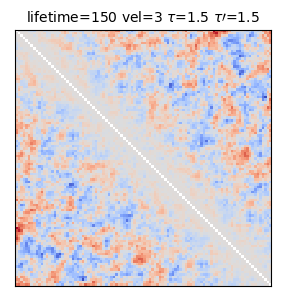

folder_face_1.0_back_0_Clife_1.5_Cof_1.5_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.0088533075018251


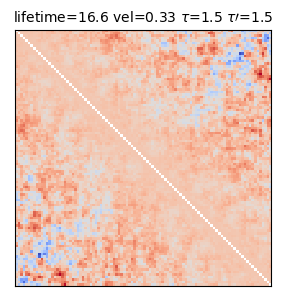

folder_face_1.0_back_0_Clife_1.5_Cof_1.5_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.0364936445011568


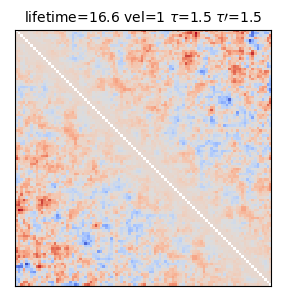

folder_face_1.0_back_0_Clife_1.5_Cof_1.5_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.0901881165812404


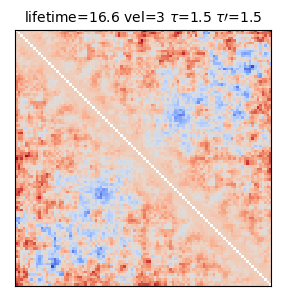

folder_face_1.0_back_0_Clife_1.5_Cof_1.5_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.0087705418442738


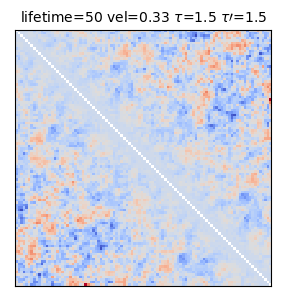

folder_face_1.0_back_0_Clife_1.5_Cof_1.5_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.0027595934053728


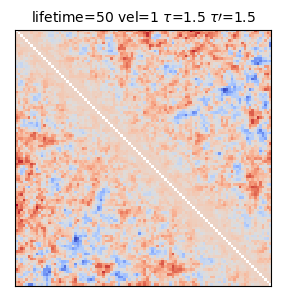

folder_face_1.0_back_0_Clife_1.5_Cof_1.5_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.0170026698118924


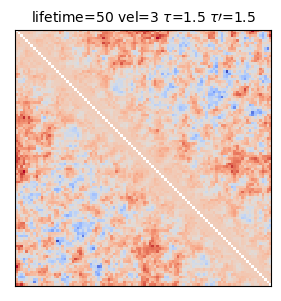

folder_face_1.0_back_0_Clife_1.5_Cof_3_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.0137110159321858


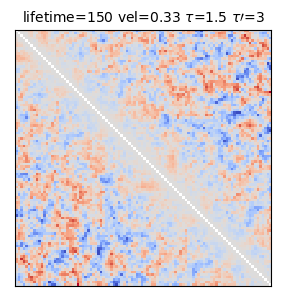

folder_face_1.0_back_0_Clife_1.5_Cof_3_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.03937625654728


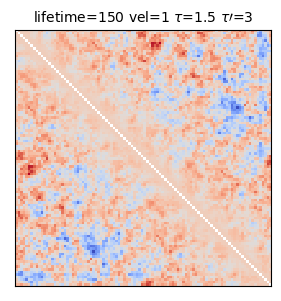

folder_face_1.0_back_0_Clife_1.5_Cof_3_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
0.9530086256234669


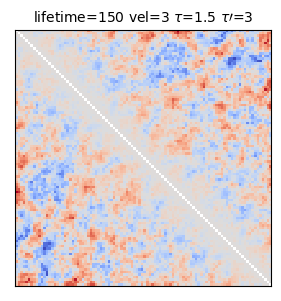

folder_face_1.0_back_0_Clife_1.5_Cof_3_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.0123076413214627


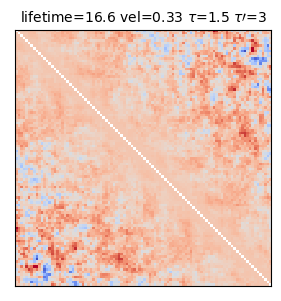

folder_face_1.0_back_0_Clife_1.5_Cof_3_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.0436521076205076


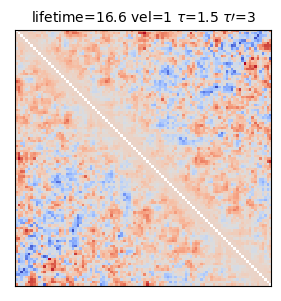

folder_face_1.0_back_0_Clife_1.5_Cof_3_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.040397752812562


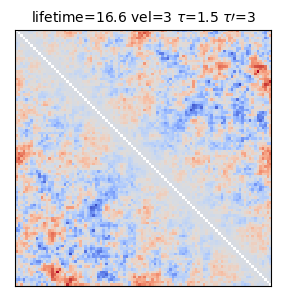

folder_face_1.0_back_0_Clife_1.5_Cof_3_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
0.9772877795233158


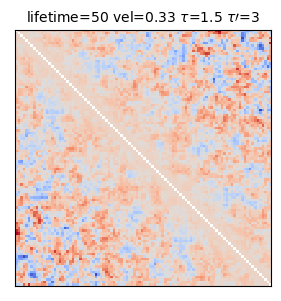

folder_face_1.0_back_0_Clife_1.5_Cof_3_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.0224907554435512


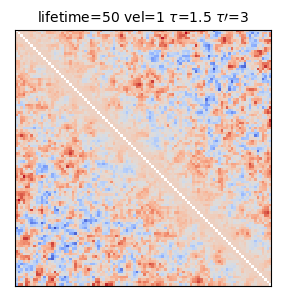

folder_face_1.0_back_0_Clife_1.5_Cof_3_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.0055083874919468


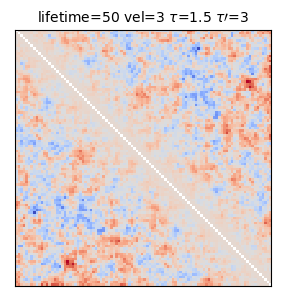

folder_face_1.0_back_0_Clife_15_Cof_0.15_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.7795247850471088


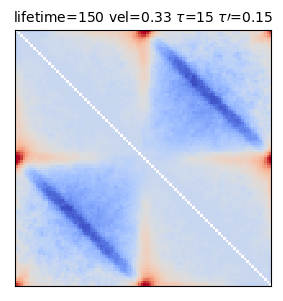

folder_face_1.0_back_0_Clife_15_Cof_0.15_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.2714006923231458


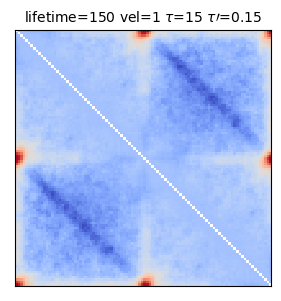

folder_face_1.0_back_0_Clife_15_Cof_0.15_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.1522760948420638


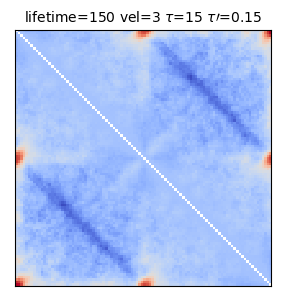

folder_face_1.0_back_0_Clife_15_Cof_0.15_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.3985208594299228


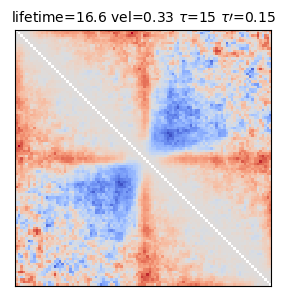

folder_face_1.0_back_0_Clife_15_Cof_0.15_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.580928941857283


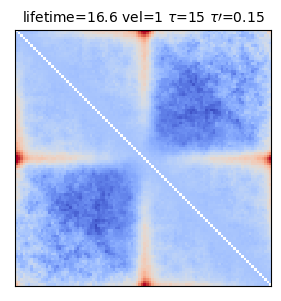

folder_face_1.0_back_0_Clife_15_Cof_0.15_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.497877045151086


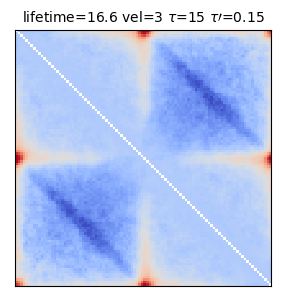

folder_face_1.0_back_0_Clife_15_Cof_0.15_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.7609380906253438


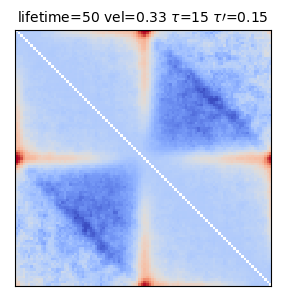

folder_face_1.0_back_0_Clife_15_Cof_0.15_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.4911393478996267


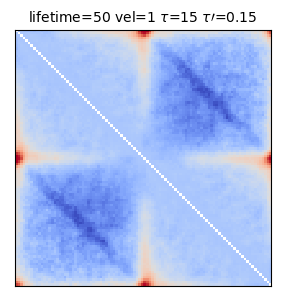

folder_face_1.0_back_0_Clife_15_Cof_0.15_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.305092806614502


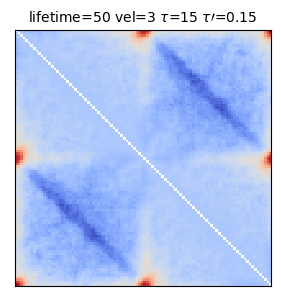

folder_face_1.0_back_0_Clife_15_Cof_0.1_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.8305771741353984


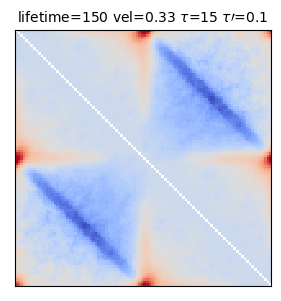

folder_face_1.0_back_0_Clife_15_Cof_0.1_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.751449324904743


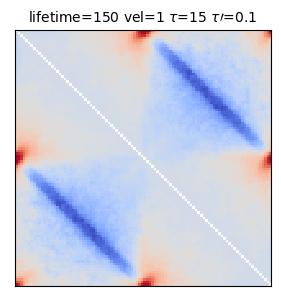

folder_face_1.0_back_0_Clife_15_Cof_0.1_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.2115812868749911


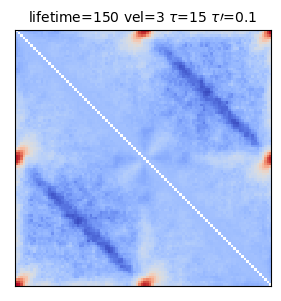

folder_face_1.0_back_0_Clife_15_Cof_0.1_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.420666181128232


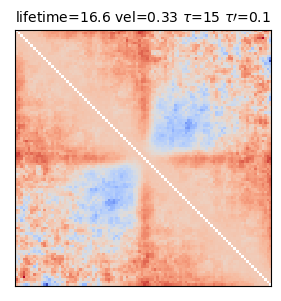

folder_face_1.0_back_0_Clife_15_Cof_0.1_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.7496841614238463


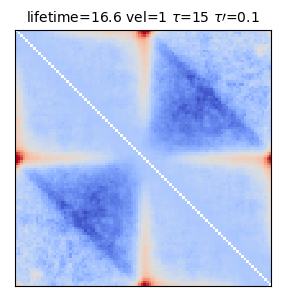

folder_face_1.0_back_0_Clife_15_Cof_0.1_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.5678007479741694


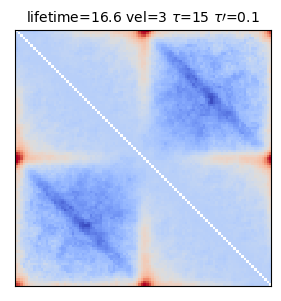

folder_face_1.0_back_0_Clife_15_Cof_0.1_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.797767022437232


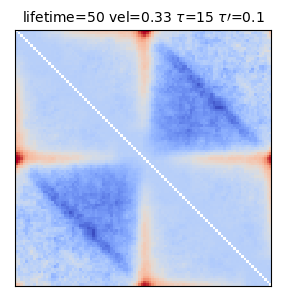

folder_face_1.0_back_0_Clife_15_Cof_0.1_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.801058284939881


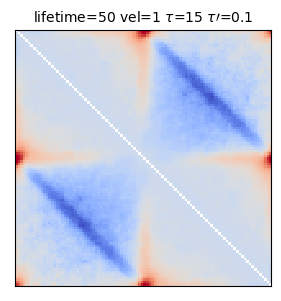

folder_face_1.0_back_0_Clife_15_Cof_0.1_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.4000813746024139


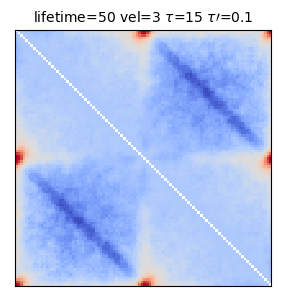

folder_face_1.0_back_0_Clife_15_Cof_0.3_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.7983000247811673


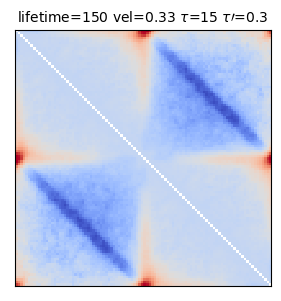

folder_face_1.0_back_0_Clife_15_Cof_0.3_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.2749705200571515


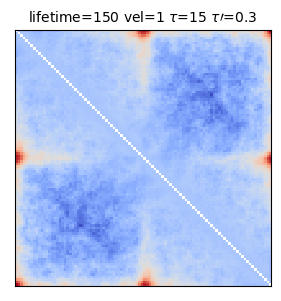

folder_face_1.0_back_0_Clife_15_Cof_0.3_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.153346960181239


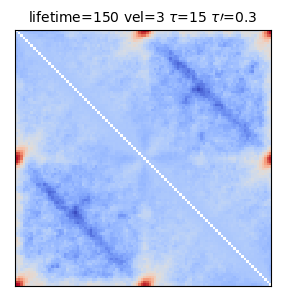

folder_face_1.0_back_0_Clife_15_Cof_0.3_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.414389441594607


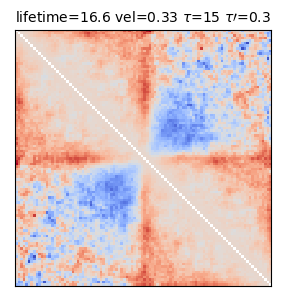

folder_face_1.0_back_0_Clife_15_Cof_0.3_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.4966135497183626


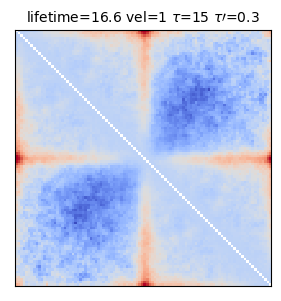

folder_face_1.0_back_0_Clife_15_Cof_0.3_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.4789252780232056


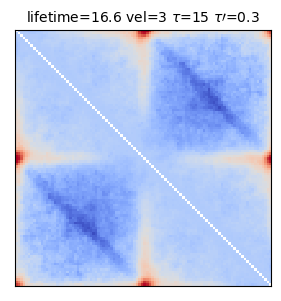

folder_face_1.0_back_0_Clife_15_Cof_0.3_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.8358797363516601


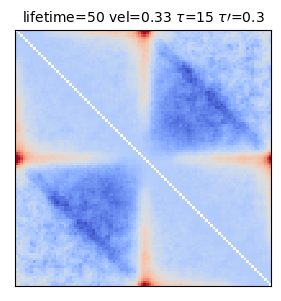

folder_face_1.0_back_0_Clife_15_Cof_0.3_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.316157359841302


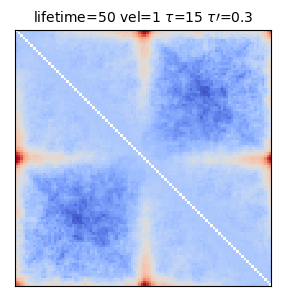

folder_face_1.0_back_0_Clife_15_Cof_0.3_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.348409543885144


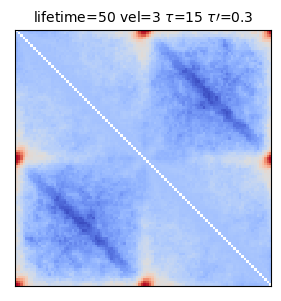

folder_face_1.0_back_0_Clife_15_Cof_1.5_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.1246209834767926


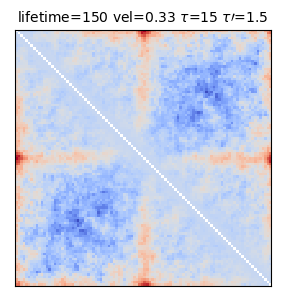

folder_face_1.0_back_0_Clife_15_Cof_1.5_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.1472086055105877


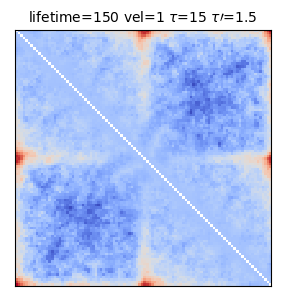

folder_face_1.0_back_0_Clife_15_Cof_1.5_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.0722823861087951


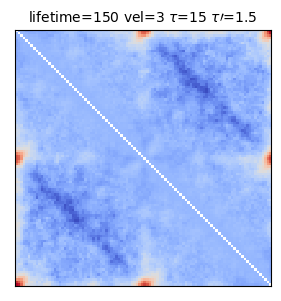

folder_face_1.0_back_0_Clife_15_Cof_1.5_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.1552942164826083


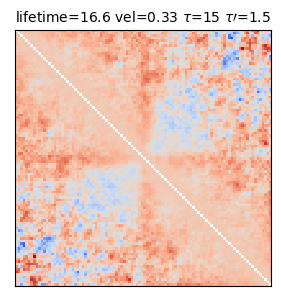

folder_face_1.0_back_0_Clife_15_Cof_1.5_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.3948522448021028


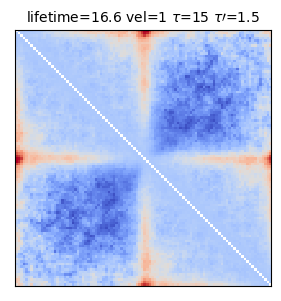

folder_face_1.0_back_0_Clife_15_Cof_1.5_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.4545188016377153


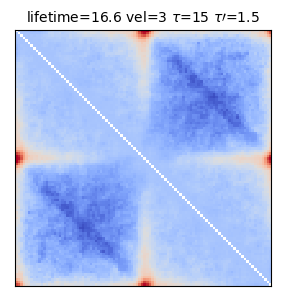

folder_face_1.0_back_0_Clife_15_Cof_1.5_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.2342338722831625


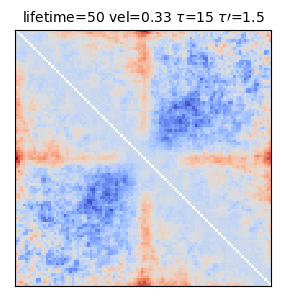

folder_face_1.0_back_0_Clife_15_Cof_1.5_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.228668035311693


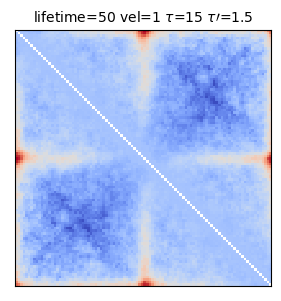

folder_face_1.0_back_0_Clife_15_Cof_1.5_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.238864732047907


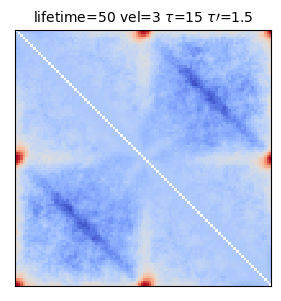

folder_face_1.0_back_0_Clife_15_Cof_3_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.097460535142608


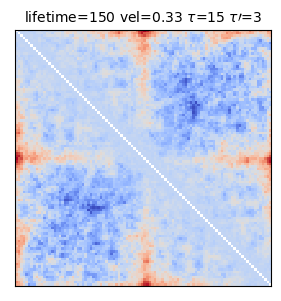

folder_face_1.0_back_0_Clife_15_Cof_3_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.1138001356929559


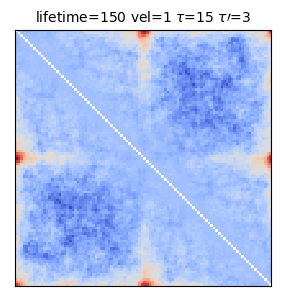

folder_face_1.0_back_0_Clife_15_Cof_3_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.0980233001934265


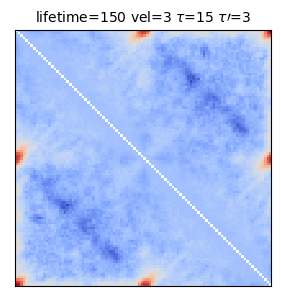

folder_face_1.0_back_0_Clife_15_Cof_3_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.1797311706975495


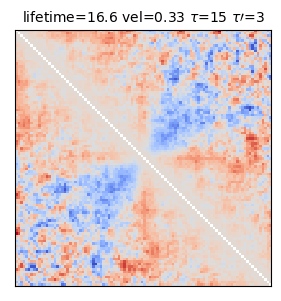

folder_face_1.0_back_0_Clife_15_Cof_3_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.282861985002093


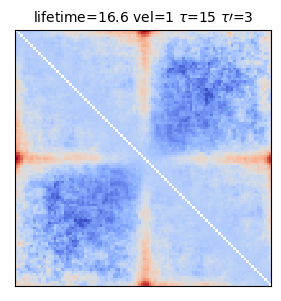

folder_face_1.0_back_0_Clife_15_Cof_3_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.3623434911917423


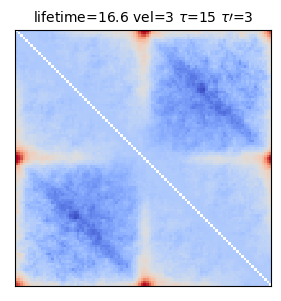

folder_face_1.0_back_0_Clife_15_Cof_3_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.178120943508636


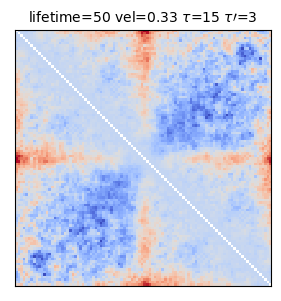

folder_face_1.0_back_0_Clife_15_Cof_3_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.280535838696052


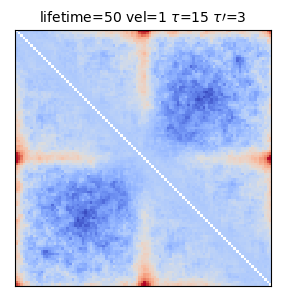

folder_face_1.0_back_0_Clife_15_Cof_3_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.2532770979269925


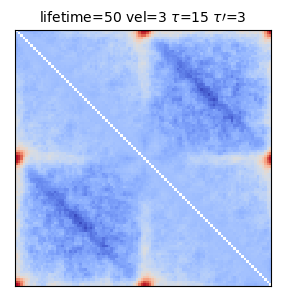

folder_face_1.0_back_0_Clife_30_Cof_0.15_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.901679612122521


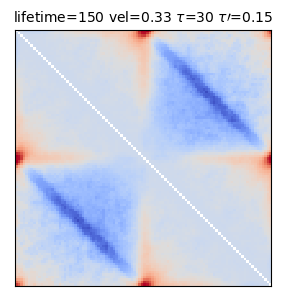

folder_face_1.0_back_0_Clife_30_Cof_0.15_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.3852514334151778


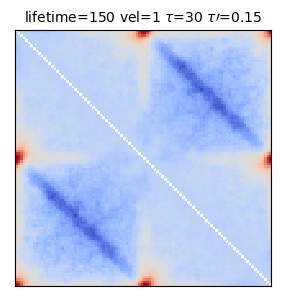

folder_face_1.0_back_0_Clife_30_Cof_0.15_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.2236840597285639


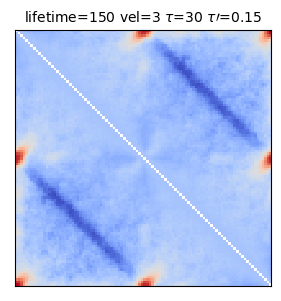

folder_face_1.0_back_0_Clife_30_Cof_0.15_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.469136762961554


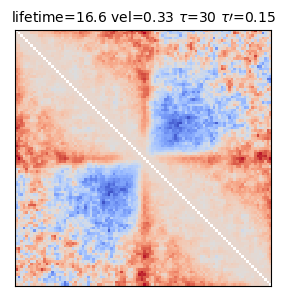

folder_face_1.0_back_0_Clife_30_Cof_0.15_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.7002267673928735


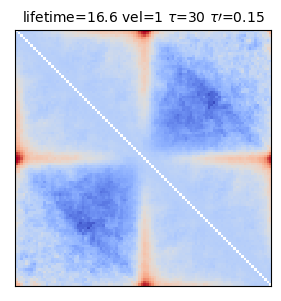

folder_face_1.0_back_0_Clife_30_Cof_0.15_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.6461637705881622


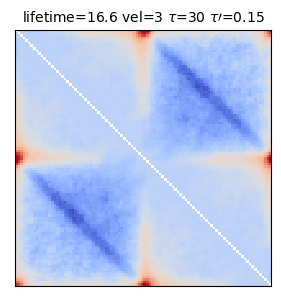

folder_face_1.0_back_0_Clife_30_Cof_0.15_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.8503433144080381


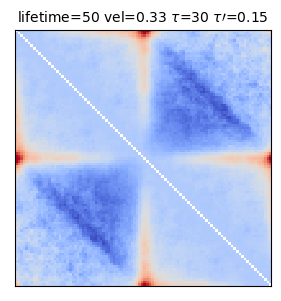

folder_face_1.0_back_0_Clife_30_Cof_0.15_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.5692313912341607


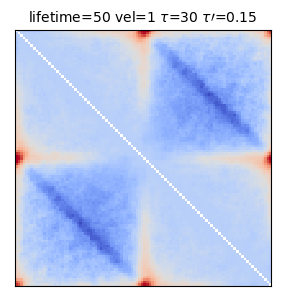

folder_face_1.0_back_0_Clife_30_Cof_0.15_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.3829325118067748


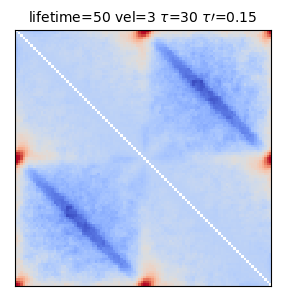

folder_face_1.0_back_0_Clife_30_Cof_0.1_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.8893814701044698


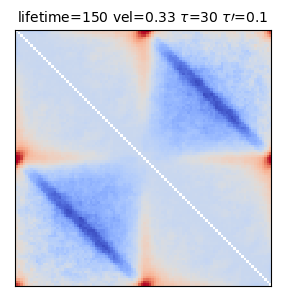

folder_face_1.0_back_0_Clife_30_Cof_0.1_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.7916703589050194


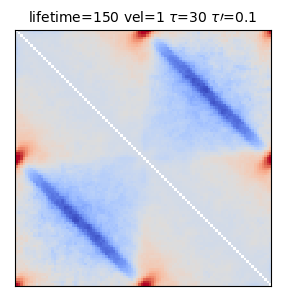

folder_face_1.0_back_0_Clife_30_Cof_0.1_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.310049883450584


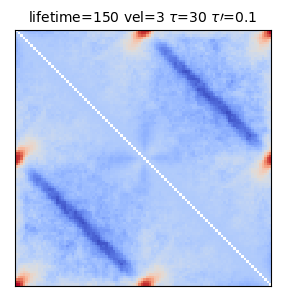

folder_face_1.0_back_0_Clife_30_Cof_0.1_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.472015008206056


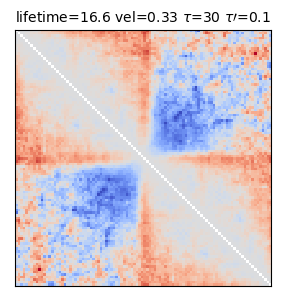

folder_face_1.0_back_0_Clife_30_Cof_0.1_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.7442864235647235


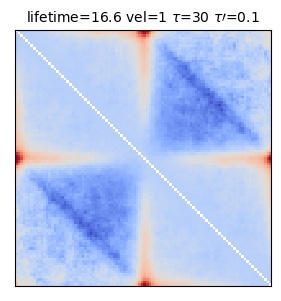

folder_face_1.0_back_0_Clife_30_Cof_0.1_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.6524776566761896


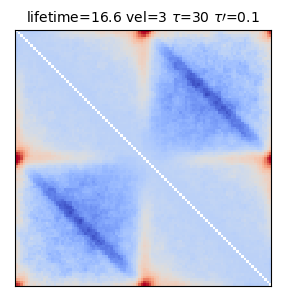

folder_face_1.0_back_0_Clife_30_Cof_0.1_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.839004597345062


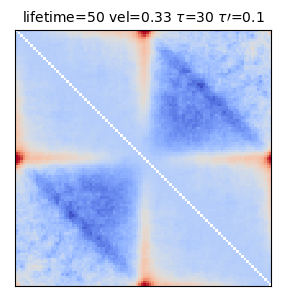

folder_face_1.0_back_0_Clife_30_Cof_0.1_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.8391922977684598


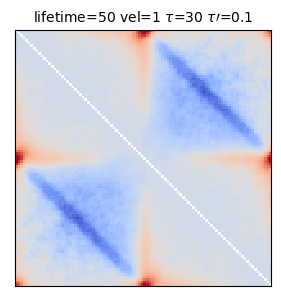

folder_face_1.0_back_0_Clife_30_Cof_0.1_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.474596122132076


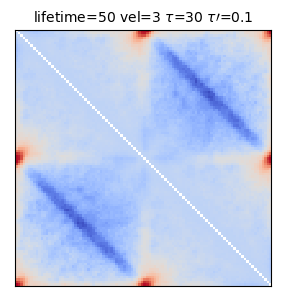

folder_face_1.0_back_0_Clife_30_Cof_0.3_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.885020100002052


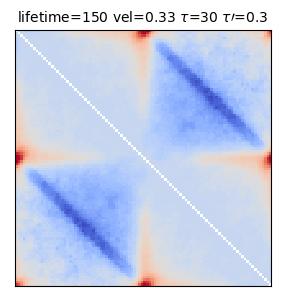

folder_face_1.0_back_0_Clife_30_Cof_0.3_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.3486621384820892


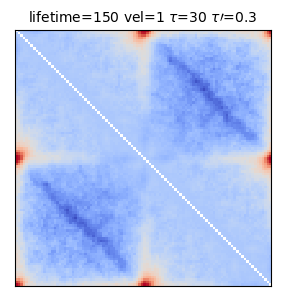

folder_face_1.0_back_0_Clife_30_Cof_0.3_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.2158384515195964


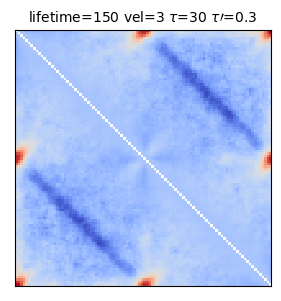

folder_face_1.0_back_0_Clife_30_Cof_0.3_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.3884417038027437


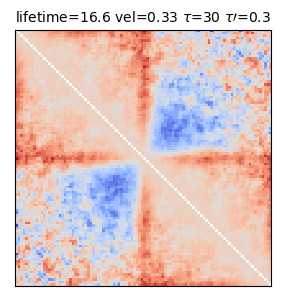

folder_face_1.0_back_0_Clife_30_Cof_0.3_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.5834475095342213


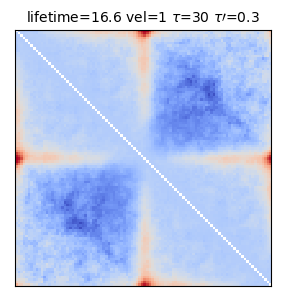

folder_face_1.0_back_0_Clife_30_Cof_0.3_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.5399032988587429


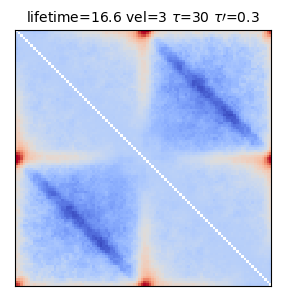

folder_face_1.0_back_0_Clife_30_Cof_0.3_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.7863217185345386


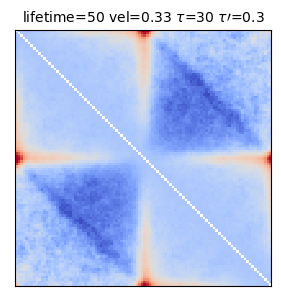

folder_face_1.0_back_0_Clife_30_Cof_0.3_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.4769371472123634


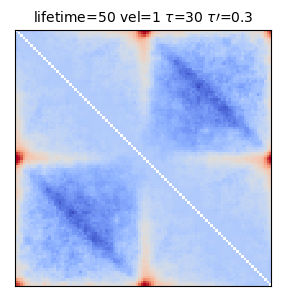

folder_face_1.0_back_0_Clife_30_Cof_0.3_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.3593051233337763


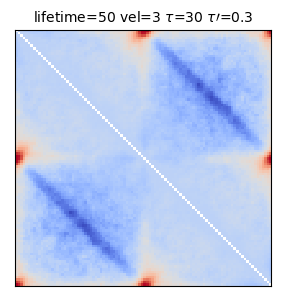

folder_face_1.0_back_0_Clife_30_Cof_1.5_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.2529375770926507


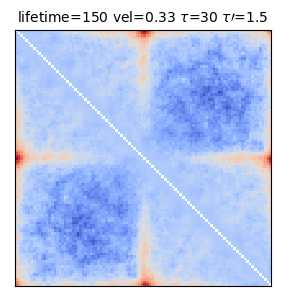

folder_face_1.0_back_0_Clife_30_Cof_1.5_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.2487251902386558


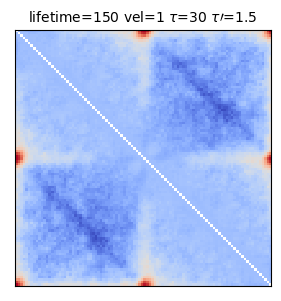

folder_face_1.0_back_0_Clife_30_Cof_1.5_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.1661491523052672


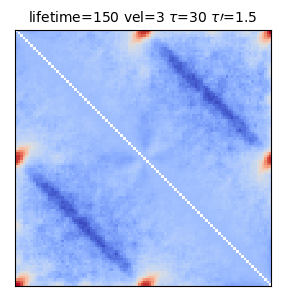

folder_face_1.0_back_0_Clife_30_Cof_1.5_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.2516834283912208


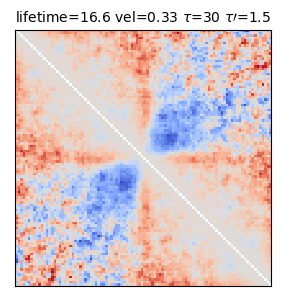

folder_face_1.0_back_0_Clife_30_Cof_1.5_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.5149501613982528


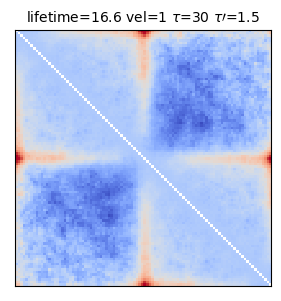

folder_face_1.0_back_0_Clife_30_Cof_1.5_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.541875181341902


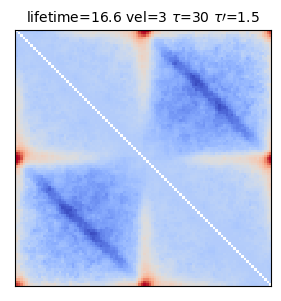

folder_face_1.0_back_0_Clife_30_Cof_1.5_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.3059058725858752


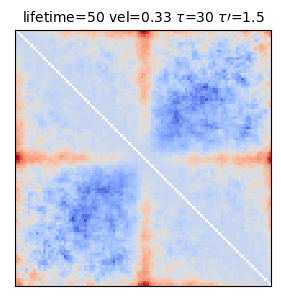

folder_face_1.0_back_0_Clife_30_Cof_1.5_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.3721054894792697


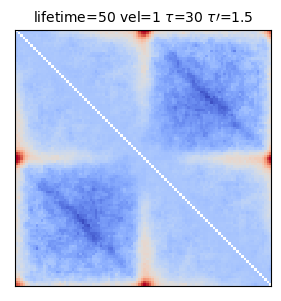

folder_face_1.0_back_0_Clife_30_Cof_1.5_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.4629397160795308


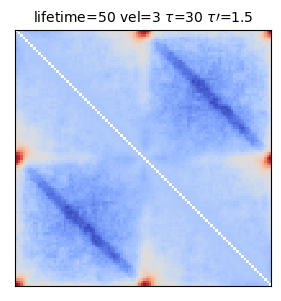

folder_face_1.0_back_0_Clife_30_Cof_3_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.243616455637613


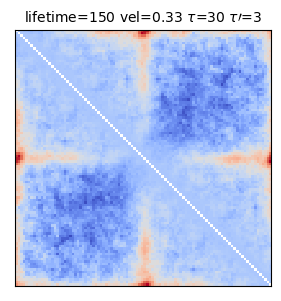

folder_face_1.0_back_0_Clife_30_Cof_3_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.2596852238827478


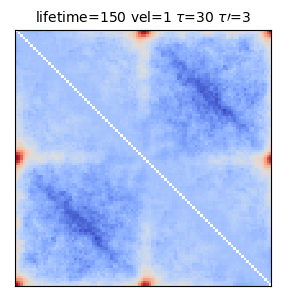

folder_face_1.0_back_0_Clife_30_Cof_3_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.1619066122333004


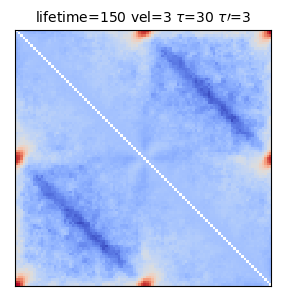

folder_face_1.0_back_0_Clife_30_Cof_3_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.2622362128141673


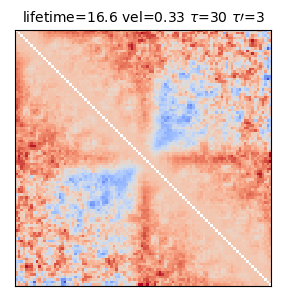

folder_face_1.0_back_0_Clife_30_Cof_3_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.486614172501804


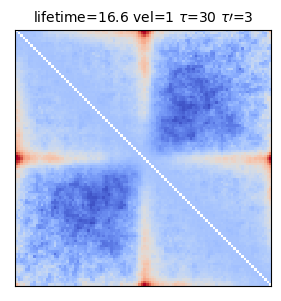

folder_face_1.0_back_0_Clife_30_Cof_3_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.5455243819186655


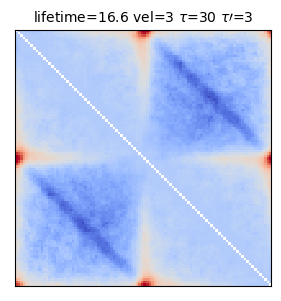

folder_face_1.0_back_0_Clife_30_Cof_3_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.2931767847996267


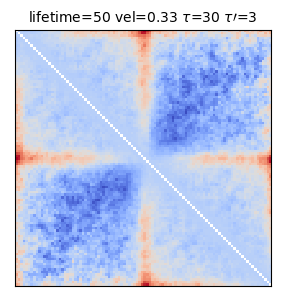

folder_face_1.0_back_0_Clife_30_Cof_3_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.3365485411714804


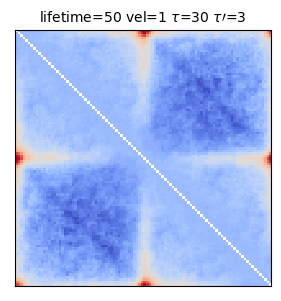

folder_face_1.0_back_0_Clife_30_Cof_3_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.3563025214413655


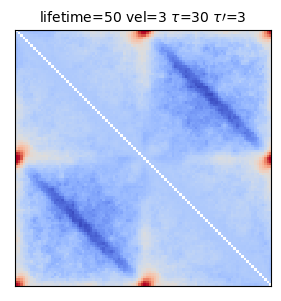

folder_face_1.0_back_0_Clife_3_Cof_0.15_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.8738040946593282


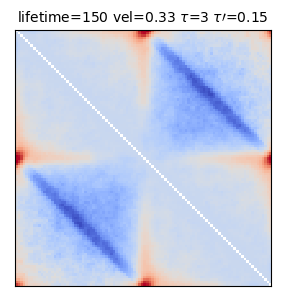

folder_face_1.0_back_0_Clife_3_Cof_0.15_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.1248937674438182


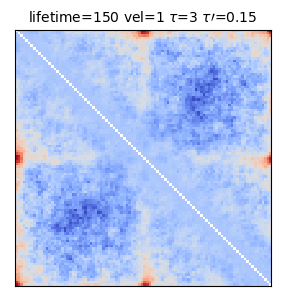

folder_face_1.0_back_0_Clife_3_Cof_0.15_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.0241294791744258


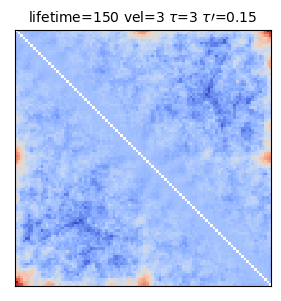

folder_face_1.0_back_0_Clife_3_Cof_0.15_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.374094458827324


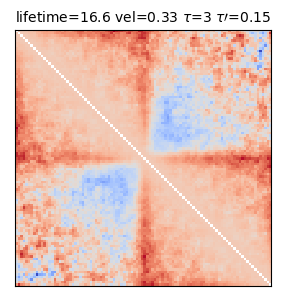

folder_face_1.0_back_0_Clife_3_Cof_0.15_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.259460489313705


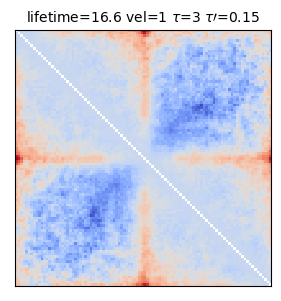

folder_face_1.0_back_0_Clife_3_Cof_0.15_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.218367336507352


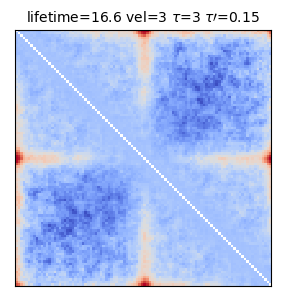

folder_face_1.0_back_0_Clife_3_Cof_0.15_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.7865935036381566


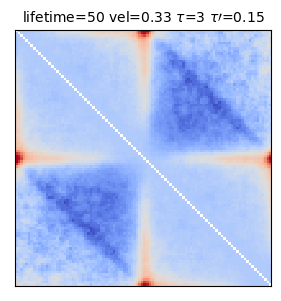

folder_face_1.0_back_0_Clife_3_Cof_0.15_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.2011770501381107


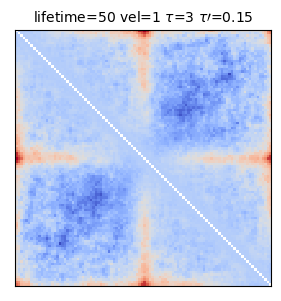

folder_face_1.0_back_0_Clife_3_Cof_0.15_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.127653185935406


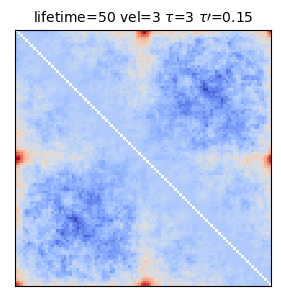

folder_face_1.0_back_0_Clife_3_Cof_0.1_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.841941761727192


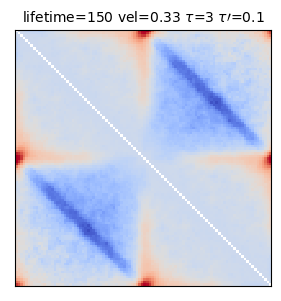

folder_face_1.0_back_0_Clife_3_Cof_0.1_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.74865573662395


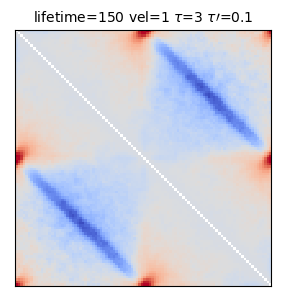

folder_face_1.0_back_0_Clife_3_Cof_0.1_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.0492007771694964


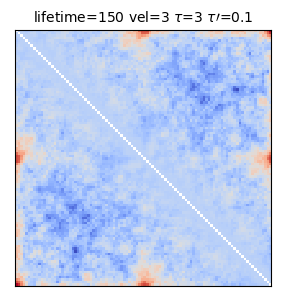

folder_face_1.0_back_0_Clife_3_Cof_0.1_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.3670396374131153


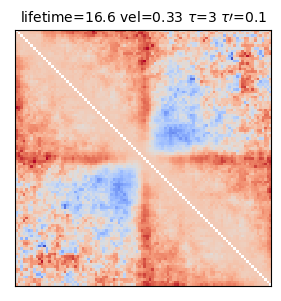

folder_face_1.0_back_0_Clife_3_Cof_0.1_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.7710843913727352


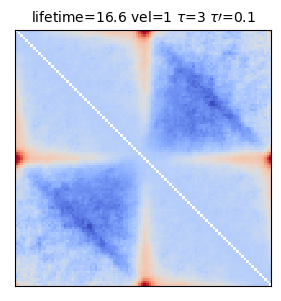

folder_face_1.0_back_0_Clife_3_Cof_0.1_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.2948281870946923


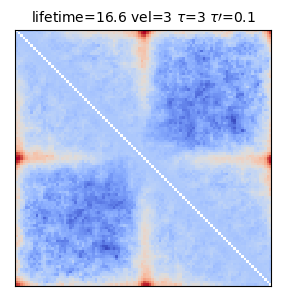

folder_face_1.0_back_0_Clife_3_Cof_0.1_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.7849794542714998


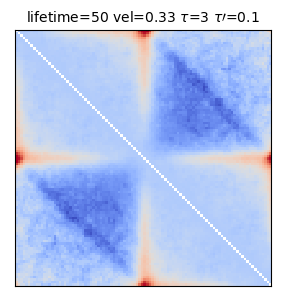

folder_face_1.0_back_0_Clife_3_Cof_0.1_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.9064333953944161


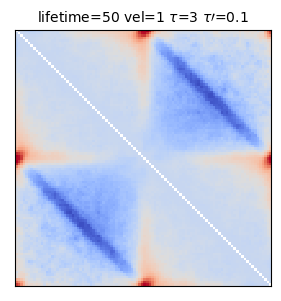

folder_face_1.0_back_0_Clife_3_Cof_0.1_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.197958744275147


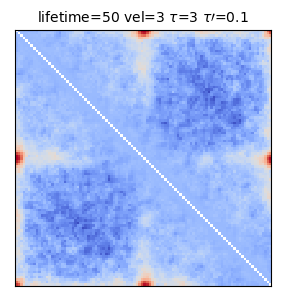

folder_face_1.0_back_0_Clife_3_Cof_0.3_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.8446348379088529


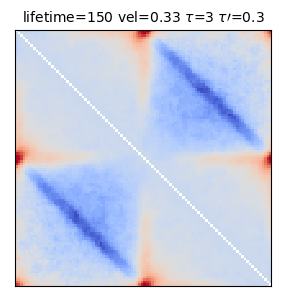

folder_face_1.0_back_0_Clife_3_Cof_0.3_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.1009793006791428


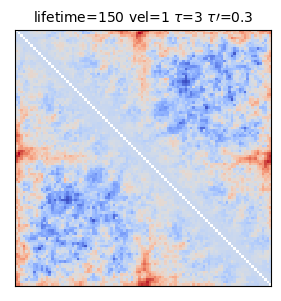

folder_face_1.0_back_0_Clife_3_Cof_0.3_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.0112449347259869


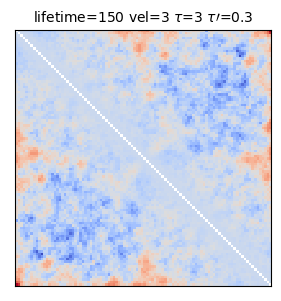

folder_face_1.0_back_0_Clife_3_Cof_0.3_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.380030454096613


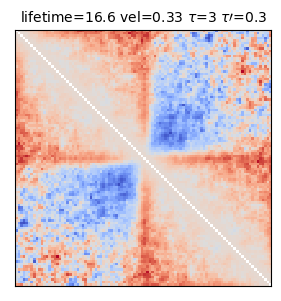

folder_face_1.0_back_0_Clife_3_Cof_0.3_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.1434741363914729


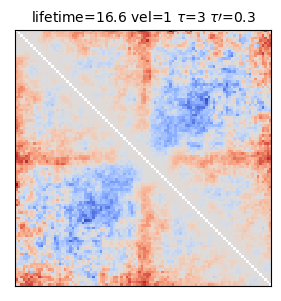

folder_face_1.0_back_0_Clife_3_Cof_0.3_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.2143322831913528


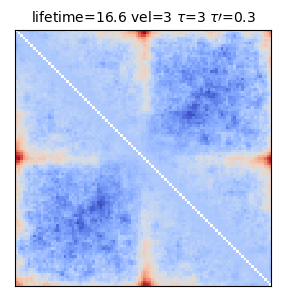

folder_face_1.0_back_0_Clife_3_Cof_0.3_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.8762404090580835


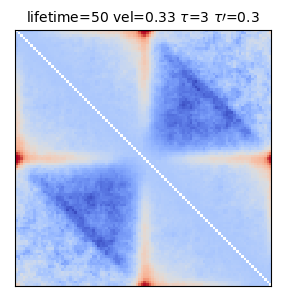

folder_face_1.0_back_0_Clife_3_Cof_0.3_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.0962003274725782


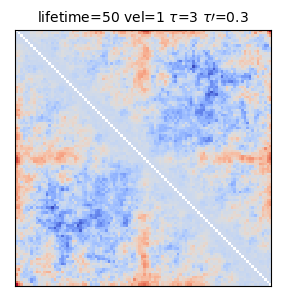

folder_face_1.0_back_0_Clife_3_Cof_0.3_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.0982212801823918


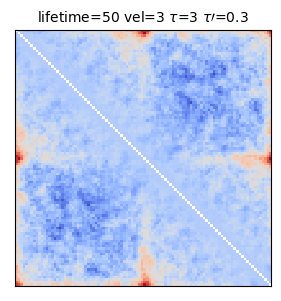

folder_face_1.0_back_0_Clife_3_Cof_1.5_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.0480598314412921


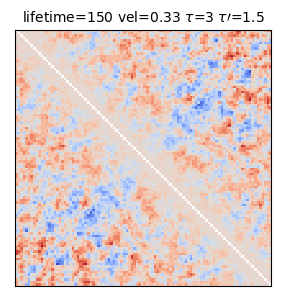

folder_face_1.0_back_0_Clife_3_Cof_1.5_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
0.9849703445106387


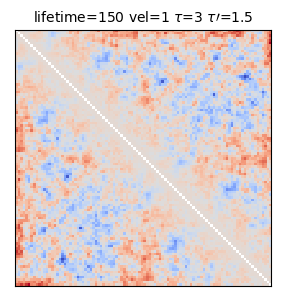

folder_face_1.0_back_0_Clife_3_Cof_1.5_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
0.9655104246184626


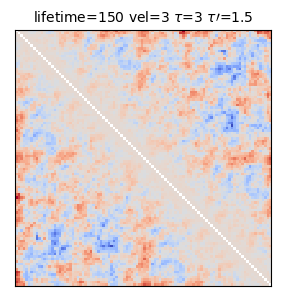

folder_face_1.0_back_0_Clife_3_Cof_1.5_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.0138448269964813


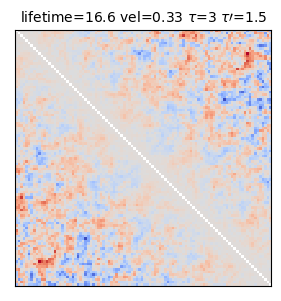

folder_face_1.0_back_0_Clife_3_Cof_1.5_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.047546357621066


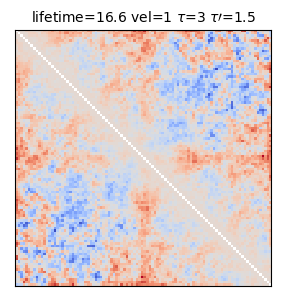

folder_face_1.0_back_0_Clife_3_Cof_1.5_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.1377496059552894


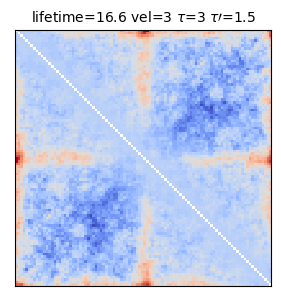

folder_face_1.0_back_0_Clife_3_Cof_1.5_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.053426304568193


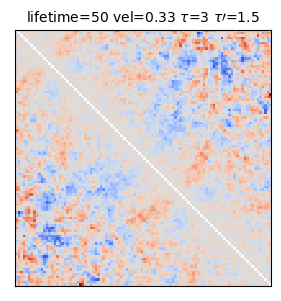

folder_face_1.0_back_0_Clife_3_Cof_1.5_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.0752374032505256


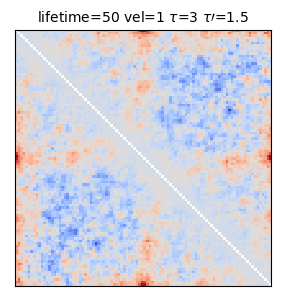

folder_face_1.0_back_0_Clife_3_Cof_1.5_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.0233446950974274


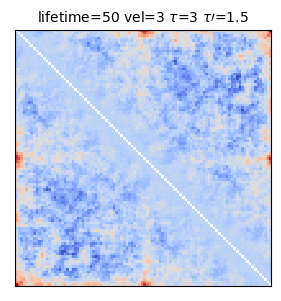

folder_face_1.0_back_0_Clife_3_Cof_3_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.0358092212263526


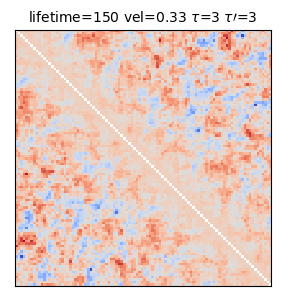

folder_face_1.0_back_0_Clife_3_Cof_3_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
0.9818355925659238


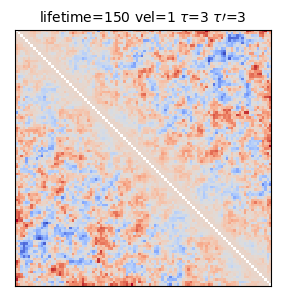

folder_face_1.0_back_0_Clife_3_Cof_3_life_150_slife_150_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.020725817683175


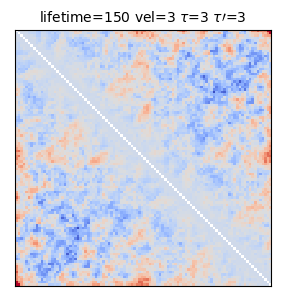

folder_face_1.0_back_0_Clife_3_Cof_3_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.011749161155727


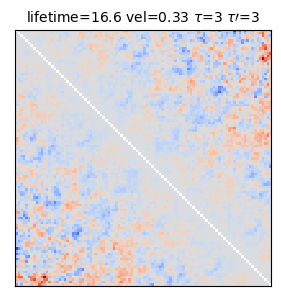

folder_face_1.0_back_0_Clife_3_Cof_3_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.092219332402581


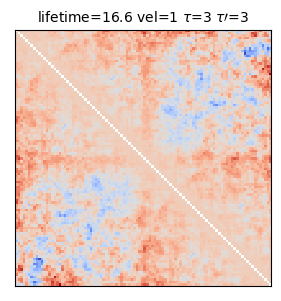

folder_face_1.0_back_0_Clife_3_Cof_3_life_16.6_slife_16.6_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.1395490763861855


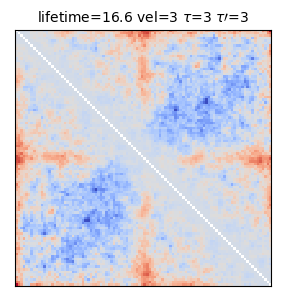

folder_face_1.0_back_0_Clife_3_Cof_3_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_0.33
1.0514972065404757


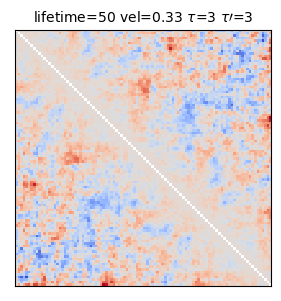

folder_face_1.0_back_0_Clife_3_Cof_3_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_1
1.0722122554938986


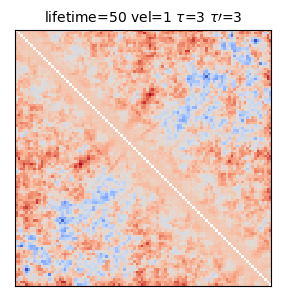

folder_face_1.0_back_0_Clife_3_Cof_3_life_50_slife_50_birth_0.1_pause_0.0_sep_100_site_10_monomer_1000_replica_10_steps_200_vel_3
1.0542584732445877


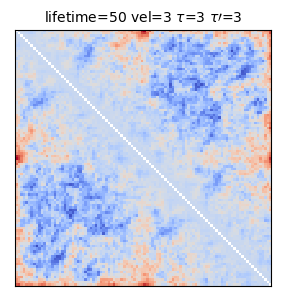

In [24]:
file=open('isoscores.csv','w')

file.write('lifetime, velocity, clife, cof, isoscore\n')
for name in path_dict.keys():
    print(name)
    params=[ast.literal_eval(i) for i in name.split('folder_')[1].split('_')[1::2]]
    face, back, clife, cof, life, slife, birth, pause, sep, site, mon, rep, step, vel = params
    
    #importing saved maps as matrices 
    data=np.load('maps/%s.npz' % name)
    mrcn=data['arr_0']
    mrc  = mrcn.astype(float)
    mrc /= np.median(np.diag(mrc,2))
    mat = np.log10(mrc)
    mrc_exp=chrmap.get_observed_over_expected(mrc)
    pile=chrmap.get_diagonal_pileup(mrc_exp, lst[1:],100)   #A function to pile up snippets around investigated features (here boundary elements)

    pseudocount=1/np.nansum(pile)
    #print(pseudocount)
    score=chrscores.isolation_score(pile,delta=3,diag_offset=18,max_dist=70,snippet_shapes='triangle',pseudo_count=pseudocount)
    print(score)
    file.write('%s,%s,%s,%s,%s\n'%(life, vel, clife, cof, score))
    #figure characteristics
    subplot_width = 3.75
    numx,numy = 3,1
    plt.figure(figsize=(subplot_width*numx,subplot_width*numy))
    c=0
    
    for i in range(1):
        c+=1
        plt.subplot(numy,numx, c)
        #plt.colorbar(im, fraction=0.046, pad=0.04, label='FRiP, window ='+str(window_size))
        plt.title(r'lifetime=%s vel=%s $\tau$=%s $\tau\prime$=%s'%(life,vel,clife,cof), fontsize =10)
        plt.matshow(np.log10(pile), cmap='coolwarm',fignum=False);
        plt.xticks([])
        plt.yticks([])
        plt.savefig('pileup_for_occup_0.9_clife_%s.png'%clife, transparent=True,bbox_inches="tight")
    plt.show()
file.close()

### Analysis

In [11]:
file = pd.read_csv('isoscores.csv')
file

lifetime   velocity   clife   cof   isoscore
0       150.0       0.33     1.5  0.15   1.857199
1       150.0       1.00     1.5  0.15   1.103407
2       150.0       3.00     1.5  0.15   1.089386
3        16.6       0.33     1.5  0.15   1.428643
4        16.6       1.00     1.5  0.15   1.133540
..        ...        ...     ...   ...        ...
175      16.6       1.00     3.0  3.00   1.092219
176      16.6       3.00     3.0  3.00   1.139549
177      50.0       0.33     3.0  3.00   1.051497
178      50.0       1.00     3.0  3.00   1.072212
179      50.0       3.00     3.0  3.00   1.054258

[180 rows x 5 columns]

In [12]:
lifetime = file['lifetime']
velocity = file[' velocity']
clife = file[' clife']
cof = file[' cof']

unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)

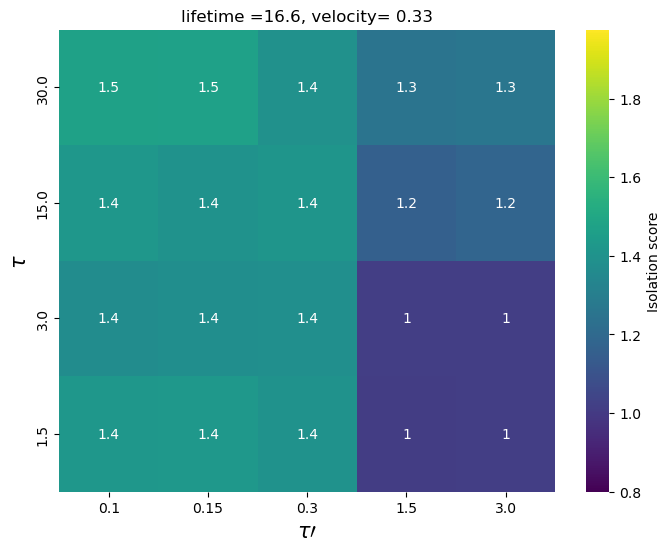

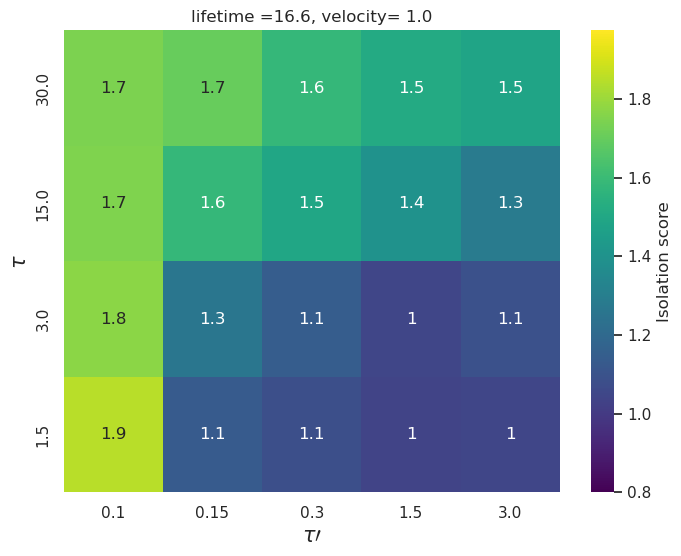

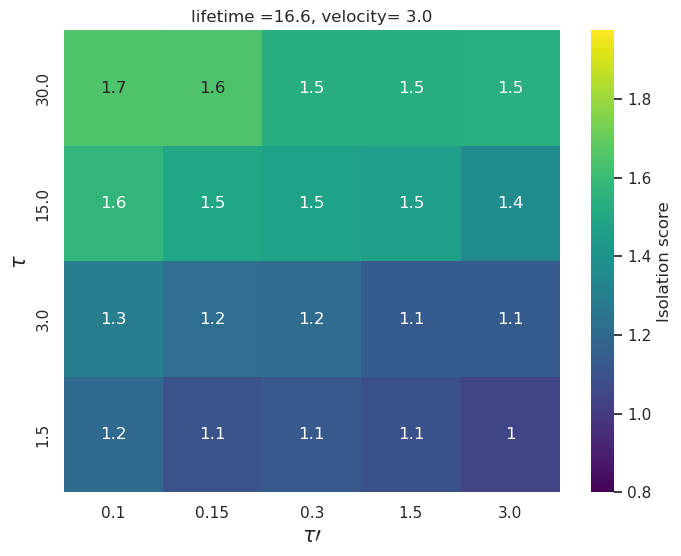

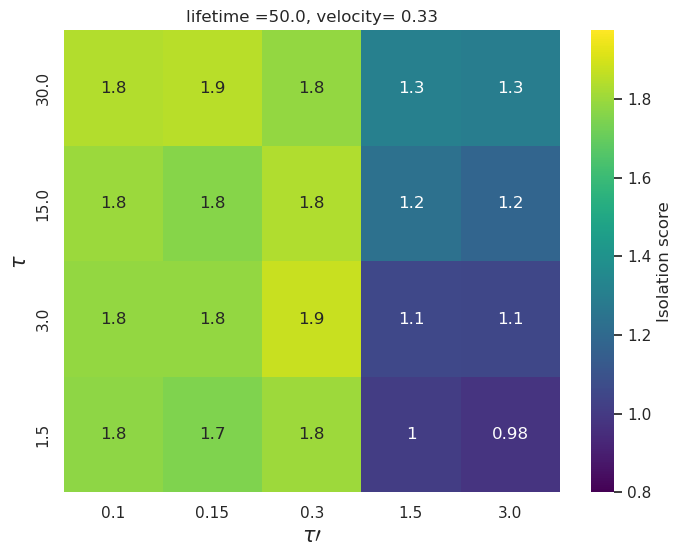

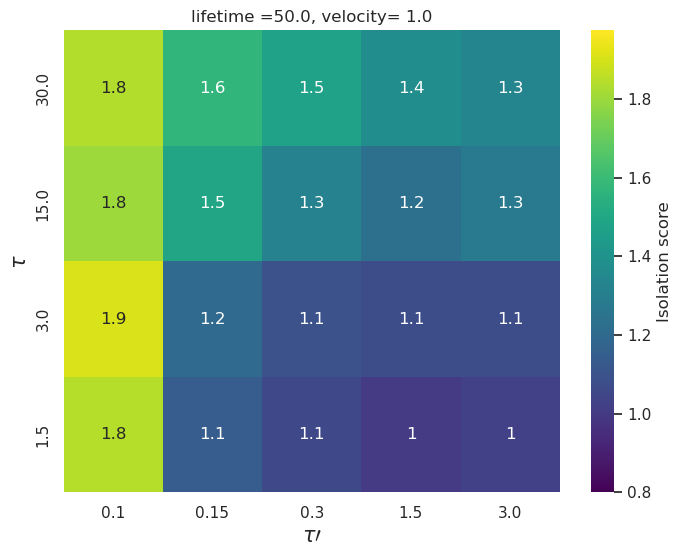

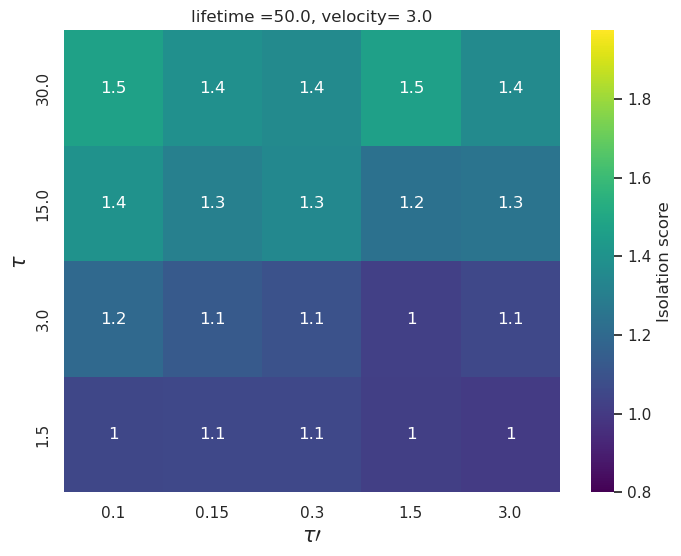

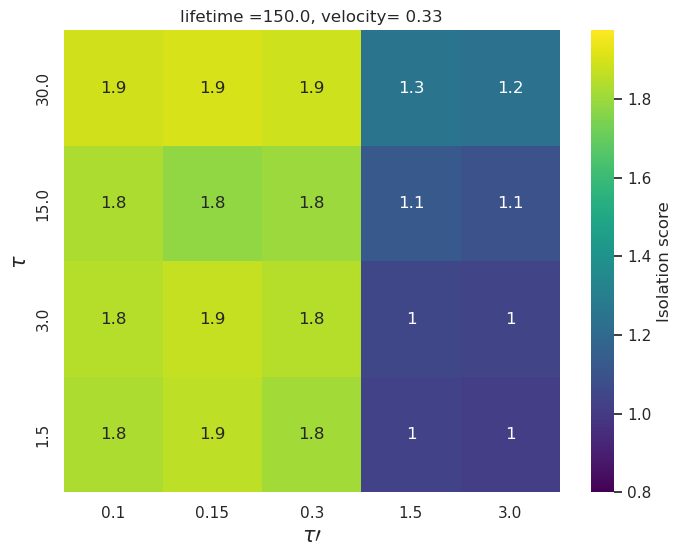

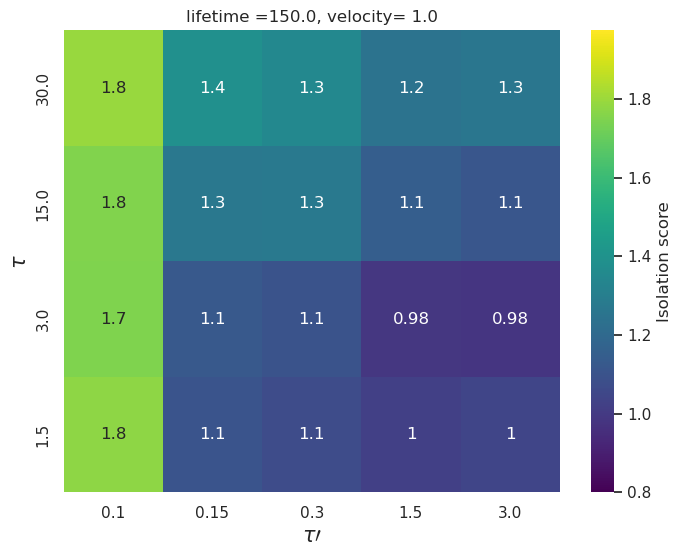

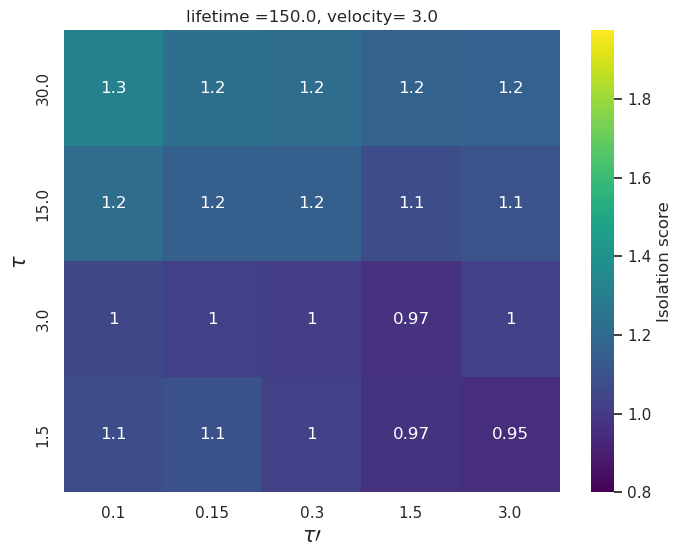

In [13]:
import seaborn as sns


for life in list(unique_life):
    for vel in list(unique_vel):
        new_file = file[(lifetime == life)&(velocity == vel) ][[' clife',' cof',' isoscore']]
        #print(new_file)
        heatmap_data = new_file.pivot(' clife', ' cof', ' isoscore')
        #print(heatmap_data)
        # Create the heatmap using seaborn
        plt.figure(figsize=(8, 6))
        im = sns.heatmap(heatmap_data, annot=True, cmap='viridis', vmax=1.975, vmin =0.8, cbar_kws={'label': 'Isolation score'} )
        sns.set(font_scale=1)
        # Customize labels and title
        plt.xlabel(r'$\tau\prime$', fontsize = 15)
        plt.ylabel(r'$\tau$', fontsize =15)
        plt.title('lifetime =%s, velocity= %s'%(life, vel))
        plt.gca().invert_yaxis()
        plt.savefig('isolation_for_%s_%s.png'%(life, vel), transparent = True, bbox_inches = 'tight')
        # Show the plot
        plt.show()